In [1]:
import numpy as np
import argparse
import time
import cv2 as cv
import matplotlib.pyplot as plt
import random
from PIL import Image, ImageDraw, ImageFont
import re
import os

In [2]:
# # import Google - drive .
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
names = ['Agni Suktam', 'agnisUktam', 'Advaita Shatakam', 'A no bhadrAH Suktam',
         'UdakashAnti Mantra', 'Rigveda Mandala 1', 'Rigveda Mandala 2', 'Rigveda Mandala 3',
         'Rigveda Mandala 4', 'Rigveda Mandala 5', 'Rigveda Mandala 6', 'Rigveda Mandala 7',
         'Rigveda Mandala 8', 'Rigveda Mandala 9', 'Rigveda Mandala 10', 'Selected verses from Rigveda',
         'oShadhIsUktam', 'Kumara Suktam', 'khilas 1', 'Ganapati sUkta from Rigveda',
         'Shri Ganapati Atharvashirsha Upanishat or Ganapati Upanishat with Accents',
         'Gosthasukta', 'Go Samuha Suktam', 'First mantra of each Veda', 'Chamakaprashna',
         'Taittiriya AraNyaka', 'Taittiriya Brahmanam', 'Taittiriya Samhita 1', 'Taittiriya Samhita',
         'TaittiriyAranyakam aruNaprashnaH', 'Trisuparna Suktam', 'durgAsUktam', 'devIsukta (Rigveda)',
         'dhanurveda', 'Dhruvasuktam Rigveda', 'Vedokta Sabija Navagraha Mantra Japa Prayogah', 'naShTa dravya prApti sUktam',
         'NakShatrasukta', 'Narayanasukta', 'nAsadIya sUkta (Rigveda )', 'PavamAnasukta', 'Pitrisuktam', 'Purushasukta',
         'Purushasukta from Shuklayajurveda', 'Krityaapariharanasuktam or Bagalamukhisuktam', 'brahmaNaspatisUktam sasvara',
         'Bhagya Suktam or Pratah Suktam', 'shrIbhUsUktam', 'bhUsUktam', 'Mantrapushpa', 'mantrapuShpAnjali', 'Manyu Suktam',
         'Maha Sauram', 'Medhasukta', 'rakShoghna sUkta Rigveda Mandala 4 and 10', 'rAtrisUktam', 'Rashtra Suktam',
         'rudram (praise of Lord Shiva) namakam and chamakam', 'Rudrapanchakam', 'Rudraprashna',
         'Shri Shuklayajurvediya Sasvara Rudrashtadhyayi', 'Shri Shuklayajurvediya Rudrashtadhyayi', 'Varuna Suktam 1',
         'Varuna Suktam 2', 'Vastu Suktam', 'vishvakarmasUktam', 'Shri Vishnu Suktam 2', 'Vishnusuktam', 'Vedamantramanjari 1',
         'Vedamantramanjari 2', 'Vedamantramanjari 3', 'Praise of Vedas from Shrimad Bhagavata Purana Skandha 10 Adhyaya 87',
         'Shantipatha', 'Shasta Suktam', 'Shivapujana Vaidika Shodashopachara', 'Shraddha Suktam', 'shrI sUkta (Rigveda)',
         'Samvada or Akhyana sukta from Rigveda Samhita Mandala 10', 'sanj~nAnasUkta', 'Rigvediya Sandhya Vandana',
         'Shukla YajurvedIya SandhyA Morning-Noon-Evening', 'Samaveda Samhita Kauthuma ShAkha', 'Suryasukta from Rigveda',
         'SaubhagyalakShmi Upanishad', 'Svasti Suktam', 'hiraNyagarbhasUktam']

In [4]:
dir = '/home/ocr/teluguOCR'
text_file_paths = []
for x in names:
  text_file_paths.append(dir + '/html_transcriptions/' + x + '.txt')#path to text file in "html_transcriptions" folder
font_paths = [dir + '/fonts/Nirmala.ttf']

In [5]:
def get_text_dimensions(text_string, font):
    if font.getmask(text_string).getbbox() == None:
      return [0,0]
    text_width = font.getmask(text_string).getbbox()[2]
    text_height = font.getmask(text_string).getbbox()[3]

    return [text_width, text_height]

def draw_telugu_text(text, font_path, font_size, text_color=(0, 0, 0)):
    font = ImageFont.truetype(font_path, font_size)

    # Get the size of the text
    text_size = get_text_dimensions(text, font)

    height = text_size[1] + 100 #image height plus 10(buffer for clear image)
    width = text_size[0] + 20 #Image width plus 10(buffer for clear image)
    img = Image.new("RGB", (width, height), "white")
    draw = ImageDraw.Draw(img)

    # Calculate the position to center the text
    x = (img.width - text_size[0]) // 2
    y = (img.height - text_size[1]) // 2

    draw.text((x, y), text, fill=text_color, font=font)
    
    # removing the excess white space on top and bottom
    image = np.array(img)
    non_zeros = []
    for i in range(image.shape[0]):
      if np.sum(image[i]) != 255*image.shape[1]*3:
        non_zeros.append(i)
    
    image = image[non_zeros[0]-5:non_zeros[-1]+5,:,:]
    img = Image.fromarray(image)
  
    return img

In [6]:
acchulu = ['అ', 'ఆ', 'ఇ', 'ఈ', 'ఉ', 'ఊ', 'ఋ', 'ౠ', 'ఌ', 'ౡ', 'ఎ', 'ఏ', 'ఐ', 'ఒ', 'ఓ', 'ఔ', 'అం', 'అః']
hallulu = ['క', 'ఖ', 'గ', 'ఘ', 'ఙ',
           'చ', 'ఛ', 'జ', 'ఝ', 'ఞ',
           'ట', 'ఠ', 'డ', 'ఢ', 'ణ',
           'త', 'థ', 'ద', 'ధ', 'న',
           'ప', 'ఫ', 'బ', 'భ', 'మ',
           'య', 'ర', 'ల', 'వ', 'శ', 'ష', 'స', 'హ', 'ళ', 'క్ష', 'ఱ']
vallulu = ['ా', 'ి', 'ీ', 'ు' , 'ూ', 'ృ', 'ౄ', 'ె', 'ే', 'ై', 'ొ', 'ో', 'ౌ', 'ం', 'ః', 'ఁ', 'ౕ', 'ౖ', 'ౢ' ]
connector = ['్']
numbers = ['౦', '౧', '౨', '౩', '౪', '౫', '౬', '౭', '౮', '౯']

varnmala = acchulu + hallulu + vallulu + connector + numbers + [' '] 

print(len(varnmala))

85


క్చ


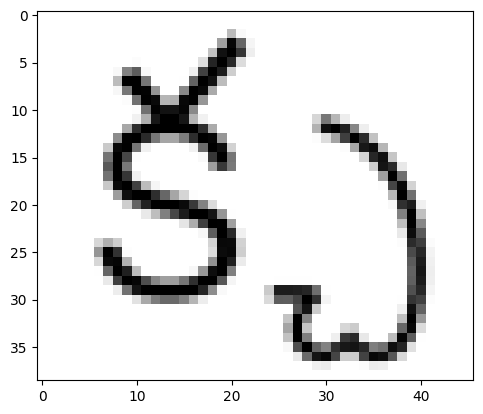

In [9]:
# s = 'క' + connector[0] + 'ౘ'
s = 'క' + connector[0] + 'చ'
print(s)

I = draw_telugu_text(s, dir + '/fonts/Nirmala.ttf',64)
m = I.size[1]//30
I = I.resize((I.size[0]//m, I.size[1]//m))

plt.imshow(I)
plt.show()

In [ ]:
# S = 'క'

# for c in [''] + hallulu:
#     s = S + connector[0] + c
#     print(s)
#     I = draw_telugu_text(s, dir + '/fonts/Nirmala.ttf', 64)
#     print(I.size)
#     m = I.size[1]//30
#     I = I.resize((I.size[0]//m, 30))
#     print(I.size)
#     plt.imshow(I, cmap = 'gray')
#     plt.show()

In [ ]:
# load the txt file and read the file line by line.
def read_file_lines(filename):
    lines = []
    try:
        with open(filename, 'r') as file:
            for line in file:
                lines.append(line.strip())  # Remove trailing newline characters
    except FileNotFoundError:
        print(f"File '{filename}' not found.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

    return lines

In [ ]:
# f_labels = open(dir + '/Dataset/labels.txt', 'w')
# i = 0
# sum = 0
# for name in names:
#     print(i)
#     l = read_file_lines(dir + '/html_transcriptions/' + name + '.txt')
#     l = l[:min(1500, len(l))]
#     sum += len(l)
#     random.shuffle(l)
#     for line in l:
#         f_labels.write(line + '\n')
#     i += 1
# f_labels.close()
# print(sum)

In [ ]:
acchulu = ['అ', 'ఆ', 'ఇ', 'ఈ', 'ఉ', 'ఊ', 'ఋ', 'ౠ', 'ఌ', 'ౡ', 'ఎ', 'ఏ', 'ఐ', 'ఒ', 'ఓ', 'ఔ', 'అం', 'అః']
hallulu = ['క', 'ఖ', 'గ', 'ఘ', 'ఙ',
           'చ', 'ఛ', 'జ', 'ఝ', 'ఞ',
           'ట', 'ఠ', 'డ', 'ఢ', 'ణ',
           'త', 'థ', 'ద', 'ధ', 'న',
           'ప', 'ఫ', 'బ', 'భ', 'మ',
           'య', 'ర', 'ల', 'వ', 'శ', 'ష', 'స', 'హ', 'ళ', 'క్ష', 'ఱ']
vallulu = ['ా', 'ి', 'ీ', 'ు' , 'ూ', 'ృ', 'ౄ', 'ె', 'ే', 'ై', 'ొ', 'ో', 'ౌ', 'ం', 'ః', 'ఁ', 'ౕ', 'ౖ', 'ౢ' ]
connector = ['్']
numbers = ['౦', '౧', '౨', '౩', '౪', '౫', '౬', '౭', '౮', '౯']

varnmala = acchulu + hallulu + vallulu + connector + numbers + [' '] 

print(len(varnmala))

In [ ]:
def cleaning_the_text_2(string):
    # remove leading and trailing spaces
    string = string.strip()
    for x in string:
        if x in varnmala:
            continue
        else:
            string = string.replace(x, '')
    return string

In [ ]:
S = ' సీద వరుణోసి ధృతవ్రతో వారుణమసి శంయోర్దేవానా సఖ్యాన్మా'
S1= cleaning_the_text_2(S)
print(S1)
print(S1[0] == ' ')
s2 =  re.sub("\s\s+" , " ", S1)
print(s2 == ' ')
if (s2 == ' '):
  print("yes")

In [ ]:
f_labels = open(dir + '/Dataset/strings_1.txt', 'w')

lines = read_file_lines(dir + '/Dataset/strings.txt')
for line in lines:
    s = cleaning_the_text_2(line)
    s =  re.sub("\s\s+" , " ", s)
    if (s != ' '):
      f_labels.write(s + '\n')

f_labels.close()

In [ ]:
lines = read_file_lines(dir + '/Dataset/labels.txt')
f_str = open(dir + '/Dataset/strings.txt', 'w')

for s in lines:
    s = cleaning_the_text_2(s)
    s = re.sub("\s\s+" , " ", s)
    if(s=='' or s == None or s == ' '):
        continue
    f_str.write(s + '\n')
f_str.close()

print(len(lines))

In [ ]:
import cv2 as cv

start = 0
lines = read_file_lines(dir + '/Dataset/strings.txt')
for ind_s in range(start, len(lines)):
  s = lines[ind_s]
  Img = draw_telugu_text(text = s, font_path = font_paths[0], font_size = 64)
  m = Img.size[1]//30
  Img = Img.resize((Img.size[0]//m, 30))
  cv.imwrite(dir + '/Dataset/Images/Image' + str(ind_s+1) + '.png', np.array(Img))
  del Img
  del m
  del s
  print(ind_s)

In [ ]:
# dir = '/home/ocr/teluguOCR'

# f_str = open(dir + "/Dataset/labels.txt", 'w')

# f1 = open(dir + "/Dataset/labels_1.txt", 'r')
# f2 = open(dir + "/Dataset/labels_2.txt", 'r')
# f3 = open(dir + "/Dataset/labels_3.txt", 'r')
# f4 = open(dir + "/Dataset/labels_4.txt", 'r')
# f5 = open(dir + "/Dataset/labels_5.txt", 'r')

# f_str.write(f1.read())
# f_str.write(f2.read())
# f_str.write(f3.read())
# f_str.write(f4.read())
# f_str.write(f5.read())

# f1.close()
# f2.close()
# f3.close()
# f4.close()
# f5.close()

# f_str.close()